# Composition MDP

In this section, we will build the example described in:

[De Giacomo, G., Mecella, M., & Patrizi, F. (2014).
Automated service composition based on behaviors: The roman model.
In Web services foundations (pp. 189-214). Springer, New York, NY.](http://www.diag.uniroma1.it/degiacom/papers/2014/WSF14.pdf)

In [1]:
from mdp_dp_rl.algorithms.dp.dp_analytic import DPAnalytic

from docs.notebooks.utils import render_target, render_service, render_composition_mdp, print_policy_data, \
    print_value_function, print_q_value_function
from stochastic_service_composition.composition import composition_mdp
from stochastic_service_composition.services import build_system_service, build_service_from_transitions
from stochastic_service_composition.target import build_target_from_transitions, Target

## Target

In [2]:
target_service = build_target_from_transitions(
    {
        "t0": {
            "hot_air_on": ("t1", 0.6, 5),
            "move_to_kitchen": ("t8", 0.2, 3),
            "open_door_kitchen": ("t7", 0.2, 2),
        },
        "t1": {"fill_up_bathtub": ("t2", 0.7, 4), "hot_air_on": ("t1", 0.3, 2)},
        "t2": {
            "move_to_bathroom": ("t3", 0.5, 3),
            "open_door_bathroom": ("t2", 0.5, 2),
        },
        "t3": {"move_to_bathroom": ("t3", 0.2, 4), "wash": ("t4", 0.8, 8)},
        "t4": {"move_to_bedroom": ("t5", 1.0, 10)},
        "t5": {"empty_bathtub": ("t6", 0.9, 7), "move_to_bedroom": ("t5", 0.1, 3)},
        "t6": {"air_off": ("t7", 1.0, 10)},
        "t7": {"move_to_kitchen": ("t8", 0.5, 5), "open_door_kitchen": ("t7", 0.5, 4)},
        "t8": {
            "cook_eggs": ("t9", 0.6, 7),
            "move_to_kitchen": ("t8", 0.2, 5),
            "prepare_tea": ("t0", 0.2, 2),
        },
        "t9": {"no_op": ("t0", 0.8, 1), "vent_kitchen": ("t9", 0.2, 1)},
    },
    "t0",
    {"t0"},
)


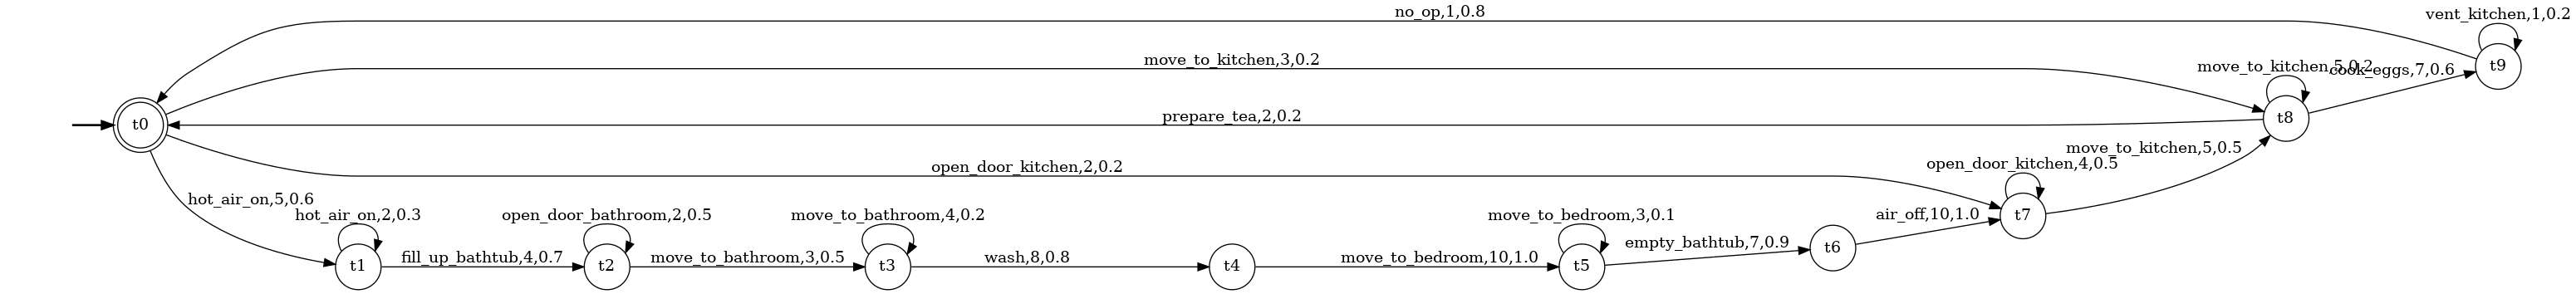

In [3]:
render_target(target_service)

## Service community

In [4]:
bathroom_heating_device = build_service_from_transitions(
    {
        "air_cold": {
            "cold_air_on": "air_cold",
            "air_off": "air_off",
        },
        "air_off": {
            "cold_air_on": "air_cold",
            "hot_air_on": "air_hot",
        },
        "air_hot": {"hot_air_on": "air_hot", "air_off": "air_off"},
    },
    "air_off",
    {"air_off"},
)

bathtub_device = build_service_from_transitions(
    {
        "empty": {
            "fill_up_bathtub": "filled",
        },
        "filled": {"empty_bathtub": "empty"},
    },
    "empty",
    {"empty"},
)


kitchen_door_device = build_service_from_transitions(
    {
        "unique": {
            "open_door_kitchen": "unique",
            "close_door_kitchen": "unique",
        },
    },
    "unique",
    {"unique"}
)

bathroom_door_device = build_service_from_transitions(
    {
        "unique": {
            "open_door_bathroom": "unique",
            "close_door_bathroom": "unique",
        },
    },
    "unique",
    {"unique"},
)

kitchen_exhaust_fan_device = build_service_from_transitions(
    {
        "unique": {
            "vent_kitchen": "unique",
        },
    },
    "unique",
    {"unique"}
)

user_behaviour = build_service_from_transitions(
    {
        "s0": {
            "move_to_bedroom": "s0",
            "move_to_bathroom": "s1",
            "move_to_kitchen": "s3",
        },
        "s1": {
            "move_to_bathroom": "s1",
            "wash": "s2",
        },
        "s2": {
            "move_to_bedroom": "s0",
        },
        "s3": {
            "move_to_kitchen": "s3",
            "cook_eggs": "s0",
            "prepare_tea": "s0",
        },
    },
    "s0",
    {"s0"}
)

all_services = [
    bathroom_heating_device,
    bathtub_device,
    kitchen_door_device,
    bathroom_door_device,
    kitchen_exhaust_fan_device,
    user_behaviour
]
system_service = build_system_service(*all_services)


render_service(system_service)

## Compute the composition MDP

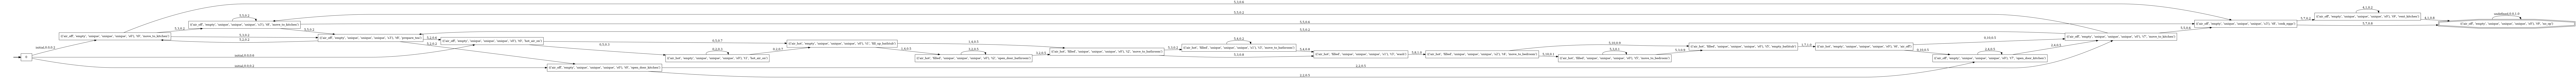

In [5]:
mdp = composition_mdp(target_service, *all_services)

render_composition_mdp(mdp)

In [6]:

print(f"Number of states: {len(mdp.all_states)}")
print("Transitions:")

for state, transitions in mdp.transitions.items():
    for action, next_states in transitions.items():
        for next_state, prob in next_states.items():
            print(state, action, next_state, prob)


Number of states: 21
Transitions:
0 initial (('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'hot_air_on') 0.6
0 initial (('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'move_to_kitchen') 0.2
0 initial (('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'open_door_kitchen') 0.2
(('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'hot_air_on') 0 (('air_hot', 'empty', 'unique', 'unique', 'unique', 's0'), 't1', 'fill_up_bathtub') 0.7
(('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'hot_air_on') 0 (('air_hot', 'empty', 'unique', 'unique', 'unique', 's0'), 't1', 'hot_air_on') 0.3
(('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'move_to_kitchen') 5 (('air_off', 'empty', 'unique', 'unique', 'unique', 's3'), 't8', 'cook_eggs') 0.6
(('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'move_to_kitchen') 5 (('air_off', 'empty', 'unique', 'unique', 'unique', 's3'), 't8', 'move_to_kitchen') 0.2


The optimal policy is:

In [7]:
opn = DPAnalytic(mdp, 1e-4)
opt_policy = opn.get_optimal_policy_vi()
value_function = opn.get_value_func_dict(opt_policy)
q_value_function = opn.get_act_value_func_dict(opt_policy)

# remove '0' state to sort output
opt_policy.policy_data.pop(0, None)
value_function.pop(0, None)
q_value_function.pop(0, None)

print_policy_data(opt_policy)
print()
print_value_function(value_function)
print()
print_q_value_function(q_value_function)

Policy:
State=(('air_hot', 'empty', 'unique', 'unique', 'unique', 's0'), 't1', 'fill_up_bathtub'),	Action=1
State=(('air_hot', 'empty', 'unique', 'unique', 'unique', 's0'), 't1', 'hot_air_on'),	Action=0
State=(('air_hot', 'empty', 'unique', 'unique', 'unique', 's0'), 't6', 'air_off'),	Action=0
State=(('air_hot', 'filled', 'unique', 'unique', 'unique', 's0'), 't2', 'move_to_bathroom'),	Action=5
State=(('air_hot', 'filled', 'unique', 'unique', 'unique', 's0'), 't2', 'open_door_bathroom'),	Action=3
State=(('air_hot', 'filled', 'unique', 'unique', 'unique', 's0'), 't5', 'empty_bathtub'),	Action=1
State=(('air_hot', 'filled', 'unique', 'unique', 'unique', 's0'), 't5', 'move_to_bedroom'),	Action=5
State=(('air_hot', 'filled', 'unique', 'unique', 'unique', 's1'), 't3', 'move_to_bathroom'),	Action=5
State=(('air_hot', 'filled', 'unique', 'unique', 'unique', 's1'), 't3', 'wash'),	Action=5
State=(('air_hot', 'filled', 'unique', 'unique', 'unique', 's2'), 't4', 'move_to_bedroom'),	Action=5
State=